In [11]:
#最初始代码

In [2]:
import pandas as pd
data=pd.read_csv('data/task1-1A.csv')
dalei=data['商品'].unique().tolist()#提取出商品总列表，方便之后进行分类
dalei

['40g双汇玉米热狗肠',
 '100g卫龙点心面黑椒牛排味',
 '咪咪虾条马来西亚风味',
 '250ml维他柠檬茶',
 '东鹏特饮',
 '卫龙大面筋',
 '卫龙亲嘴烧红烧牛肉味',
 '阿萨姆奶茶',
 '145ml旺仔牛奶盒装',
 '伊利优酸乳',
 '2g韩国海牌海苔',
 '脉动',
 '75g新麦潮天然酵母面包（北海道牛奶风味）',
 '可口可乐最新款',
 '果粒橙',
 '香豆干',
 '78g卫龙亲嘴语辣条',
 '可乐可乐',
 '32g卫龙亲嘴烧',
 '80g四洲粟一烧烧烤味',
 '86g合味道浓猪骨味',
 '330ml伊利畅意乳酸菌原味',
 '14g德芙巧克力',
 '统一绿茶',
 '205g伊利安慕希原味',
 '维他奶黑豆奶饮品',
 '86g合味道海鲜风味',
 '250ml燕塘原味酸奶',
 '450ml美汁源果粒橙',
 '500ml统一阿萨姆奶茶',
 '250ml维他奶低糖原味',
 '13g无穷烤鸡小腿蜂蜜味',
 '85g新麦潮北海道吐司',
 '芙蓉王',
 '268ml雀巢咖啡丝滑拿铁',
 '鸭翅',
 '红牛',
 '怡宝纯净水',
 '无穷农场盐_鸡蛋',
 '40g呀土豆薯片滋香烤鸡味',
 '30g无穷农场盐_鸡蛋',
 '85g嘉士利果乐果香夹心饼干蓝莓味',
 '营养快线',
 '85g统一老坛酸菜牛肉面',
 '雪碧最新款',
 '诗竹竹纤维面巾纸',
 '20g咪咪虾条马来西亚风味',
 '70g乐事薯片原味',
 '260g马来西亚进口茱蒂丝口口香饼干',
 '500ml加多宝',
 '430g泰奇八宝粥',
 '55g奥利奥原味芝士饼干',
 '50g上好佳日式鱼果',
 '50g双层百力滋奶咖味',
 '250ml红牛',
 '统一冰红茶',
 '45g双汇泡面拍挡',
 '燕塘红枣牛奶',
 '500ml农夫果园 (芒果+菠萝+番石榴)',
 '10g越南LIPO奶味面包干',
 '30g元朗小蛋卷',
 '雀巢咖啡',
 '188g澳门永辉鸡仔饼',
 '370g泰奇八宝粥',
 '乐虎（380ml）',
 '凤爪',
 '新麦潮天然酵母面包',
 '58g丽芝士纳宝帝奶酪威化饼干',
 '百事可乐500ml',
 '香脆肠',
 '12g劲仔小鱼卤香味',
 '250M

In [3]:
datasum=[]
datasem=[]
for i in dalei:
    data_x=data[data['商品']==i]['实际金额'].sum()
    data_t=data[data['商品']==i]['商品'].size
    datasum.append(data_x)#插入列表中
    datasem.append(data_t)
task1_2 = pd.DataFrame({'商品':dalei,'总实际金额':datasum,'销售量':datasem})#对列表进行整理，制作成表单
task1_2.sort_values(by='销售量',ascending=False,inplace=True)
task1_2

,商品,总实际金额,销售量
37,怡宝纯净水,1070.5,531
4,东鹏特饮,1583.5,448
7,阿萨姆奶茶,1307.5,326
11,脉动,1272.5,309
40,30g无穷农场盐_鸡蛋,922.0,264
...,...,...,...
184,和成天下（黄）,10.0,1
80,钙芝奶酪味高钙威化饼干,1.5,1
118,120g达利园蔓越莓提子面包,6.0,1
96,小茗同学冷泡茶（乳酸菌味）,5.5,1


In [4]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import preprocessing
X = preprocessing.minmax_scale(task1_2['销售量'])#对销售量数据进行缩放处理
X = pd.DataFrame(X, columns=['销售量'])#将缩放后的数据整理成列表
X

,销售量
0,1.000000
1,0.843396
2,0.613208
3,0.581132
4,0.496226
...,...
269,0.000000
270,0.000000
271,0.000000
272,0.000000


In [5]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)
#将标签插入在次插入之前task1_2表格中
task1_2['cluster']=kmeans.labels_
task1_2

,商品,总实际金额,销售量,cluster
37,怡宝纯净水,1070.5,531,2
4,东鹏特饮,1583.5,448,2
7,阿萨姆奶茶,1307.5,326,2
11,脉动,1272.5,309,2
40,30g无穷农场盐_鸡蛋,922.0,264,2
...,...,...,...,...
184,和成天下（黄）,10.0,1,0
80,钙芝奶酪味高钙威化饼干,1.5,1,0
118,120g达利园蔓越莓提子面包,6.0,1,0
96,小茗同学冷泡茶（乳酸菌味）,5.5,1,0


In [9]:
task1=task1_2['cluster']
task1

37     2
4      2
7      2
11     2
40     2
      ..
184    0
80     0
118    0
96     0
273    0
Name: cluster, Length: 274, dtype: int32

In [10]:
for i in range(len(task1)):
    if(task1[i] == 2):
        task1[i] = '热销'
    elif(task1[i]==1):
        task1[i]='正常'
    elif(task1[i]==0):
        task1[i]='滞销'
task1_2['cluster']=task1
task1=task1_2['商品']
task2=task1_2['cluster']
task=pd.DataFrame({'商品':task1,'标签':task2})
task.to_csv('csv/task3-1A.csv',encoding='gbk')

<ipython-input-10-9e9d28b4e935>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task1[i]='正常'
D:\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-10-9e9d28b4e935>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task1[i]='滞销'
<ipython-input-10-9e9d28b4e935>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [13]:
#最终实现代码
print('任务3.1：')
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import preprocessing
def task9(data,data_1):
    data1=pd.read_csv('data/'+data)
    dalei=data1['商品'].unique().tolist()#提取出商品总列表，方便之后进行分类
    datasum=[]
    datasem=[]
    for i in dalei:
        data_x=data1[data1['商品']==i]['实际金额'].sum()
        data_t=data1[data1['商品']==i]['商品'].size
        datasum.append(data_x)#插入列表中
        datasem.append(data_t)
    task1_2 = pd.DataFrame({'商品':dalei,'总实际金额':datasum,'销售量':datasem})#对列表进行整理，制作成表单
    X = preprocessing.minmax_scale(task1_2['销售量'])
    X = pd.DataFrame(X, columns=['销售量'])
    kmeans=KMeans(n_clusters=3)
    kmeans.fit(X)
    #将标签插入players表格中
    task1_2['cluster']=kmeans.labels_
    task1=list(task1_2['cluster'])
    for i in range(len(task1)):
        if(task1[i] == 2):
            task1[i] = '热销'
        elif(task1[i]==1):
            task1[i]='正常'
        elif(task1[i]==0):
            task1[i]='滞销'
    task1_2['cluster']=task1
    task1=task1_2['商品']
    task2=task1_2['cluster']
    task=pd.DataFrame({'商品':task1,'标签':task2})
    #return task
    task.to_csv('csv/'+data_1)
task9('task1-1B.csv','task3-1B.csv')
task9('task1-1C.csv','task3-1C.csv')
task9('task1-1D.csv','task3-1D.csv')
task9('task1-1E.csv','task3-1E.csv')

任务3.1：


散点图绘制：


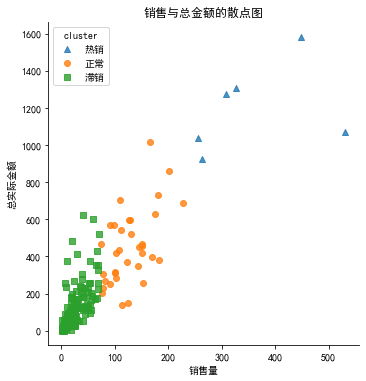

In [15]:
print('散点图绘制：')
#简略版
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']
sns.lmplot(x='销售量',y='总实际金额',hue='cluster',markers=['^','o','s'],data=task1_2,fit_reg=False,scatter_kws={'alpha':0.8},legend_out=False)
plt.xlabel('销售量')
plt.ylabel('总实际金额')
plt.title('销售与总金额的散点图')
plt.show()

In [22]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import preprocessing
def task9(data):
    data1=pd.read_csv('data/'+data)
    dalei=data1['商品'].unique().tolist()#提取出商品总列表，方便之后进行分类
    datasum=[]
    datasem=[]
    for i in dalei:
        data_x=data1[data1['商品']==i]['实际金额'].sum()
        data_t=data1[data1['商品']==i]['商品'].size
        datasum.append(data_x)#插入列表中
        datasem.append(data_t)
    task1_2 = pd.DataFrame({'商品':dalei,'总实际金额':datasum,'销售量':datasem})#对列表进行整理，制作成表单
    X = preprocessing.minmax_scale(task1_2['销售量'])
    X = pd.DataFrame(X, columns=['销售量'])
    kmeans=KMeans(n_clusters=3)
    kmeans.fit(X)
    #将标签插入players表格中
    task1_2['cluster']=kmeans.labels_
    task1=list(task1_2['cluster'])
    for i in range(len(task1)):
        if(task1[i] == 2):
            task1[i] = '热销'
        elif(task1[i]==1):
            task1[i]='正常'
        elif(task1[i]==0):
            task1[i]='滞销'
    task1_2['cluster']=task1
    task1=task1_2['商品']
    task2=task1_2['cluster']
    task=pd.DataFrame({'商品':task1,'标签':task2,'销售金额':datasum})
    return task
a=task9('task1-1A.csv')
b=task9('task1-1B.csv')
c=task9('task1-1C.csv')
d=task9('task1-1D.csv')
e=task9('task1-1E.csv')

In [25]:
print('任务3.2：')
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import preprocessing
def task10(date,date_1):
    X=preprocessing.minmax_scale(date['销售金额'])
    X=pd.DataFrame(X,columns=['销售金额'])
    kmeans=KMeans(n_clusters=3)
    kmeans.fit(X)
    date['cluster']=kmeans.labels_
    task1=list(date['cluster'])
    for i in range(len(task1)):
        if(task1[i] == 2):
            task1[i] = '高金额'
        elif(task1[i]==1):
            task1[i]='普通'
        elif(task1[i]==0):
            task1[i]='低金额'
    date['cluster']=task1
    b=date['标签']+date['cluster']
    task=pd.DataFrame({'商品':date['商品'],'销售标签':date['标签'],
                       '总金额标签':date['cluster'],'商品总体画像':b})
    task.to_csv('csv/'+date_1)
    return task
task10(a,'task3-2A.csv')
task10(b,'task3-2B.csv')
task10(c,'task3-2C.csv')
task10(d,'task3-2D.csv')
task10(e,'task3-2E.csv')

任务3.2：


,商品,销售标签,总金额标签,商品总体画像
0,430g泰奇八宝粥,滞销,高金额,滞销高金额
1,500ml农夫果园 (芒果+菠萝+番石榴),正常,低金额,正常低金额
2,150g洽洽原香瓜子,正常,低金额,正常低金额
3,250ml维他原味豆奶,滞销,高金额,滞销高金额
4,30g无穷农场盐_鸡蛋,滞销,高金额,滞销高金额
...,...,...,...,...
262,小茗同学（青柠红茶）,正常,低金额,正常低金额
263,40g盼盼手撕面包,正常,低金额,正常低金额
264,新麦潮天然酵母面包,正常,低金额,正常低金额
265,商品21,正常,低金额,正常低金额
